DataFrame API Queries Using PySpark

In [ ]:

!pip install pyspark

from pyspark.sql import SparkSession
from pyspark.sql.functions import col, lit, count, avg, row_number
from pyspark.sql.window import Window

spark = SparkSession.builder \
    .appName("Colab-PySpark-DataFrame-Queries") \
    .getOrCreate()

data = [
    (1, "Alice", 34, "Sales"),
    (2, "Bob", 45, "Marketing"),
    (3, "Cathy", 29, "Sales"),
    (4, "David", 40, "HR")
]

columns = ["id", "name", "age", "dept"]
df = spark.createDataFrame(data, columns)

print("Original DataFrame:")
df.show()

print("Selecting name and age:")
df.select("name", "age").show()

print("Employees older than 30:")
df.filter(df.age > 30).show()

print("Employees older than 30 in Sales:")
df.filter((col("age") > 30) & (col("dept") == "Sales")).show()

print("Add new column 'country':")
df.withColumn("country", lit("USA")).show()

print("Rename dept → department:")
df.withColumnRenamed("dept", "department").show()
print("Group by dept:")
df.groupBy("dept").agg(
    count("*").alias("total_employees"),
    avg("age").alias("avg_age")
).show()
print("Sorted by age ascending:")
df.orderBy("age").show()

print("Sorted by age descending:")
df.orderBy(col("age").desc()).show()

dept_data = [
    ("Sales", "Building A"),
    ("HR", "Building B"),
    ("Marketing", "Building C")
]

df2 = spark.createDataFrame(dept_data, ["dept", "location"])

print("Joining DataFrames:")
df.join(df2, on="dept", how="inner").show()

print("Window function: rank employees by age within dept:")
windowSpec = Window.partitionBy("dept").orderBy(col("age").desc())

df.withColumn("rank_by_age", row_number().over(windowSpec)).show()

df.createOrReplaceTempView("employees")

print("SQL Query: Avg age by dept")
spark.sql("""
    SELECT dept, AVG(age) AS avg_age
    FROM employees
    GROUP BY dept
""").show()

print("All tasks completed successfully!")


Original DataFrame:
+---+-----+---+---------+
| id| name|age|     dept|
+---+-----+---+---------+
|  1|Alice| 34|    Sales|
|  2|  Bob| 45|Marketing|
|  3|Cathy| 29|    Sales|
|  4|David| 40|       HR|
+---+-----+---+---------+

Selecting name and age:
+-----+---+
| name|age|
+-----+---+
|Alice| 34|
|  Bob| 45|
|Cathy| 29|
|David| 40|
+-----+---+

Employees older than 30:
+---+-----+---+---------+
| id| name|age|     dept|
+---+-----+---+---------+
|  1|Alice| 34|    Sales|
|  2|  Bob| 45|Marketing|
|  4|David| 40|       HR|
+---+-----+---+---------+

Employees older than 30 in Sales:
+---+-----+---+-----+
| id| name|age| dept|
+---+-----+---+-----+
|  1|Alice| 34|Sales|
+---+-----+---+-----+

Add new column 'country':
+---+-----+---+---------+-------+
| id| name|age|     dept|country|
+---+-----+---+---------+-------+
|  1|Alice| 34|    Sales|    USA|
|  2|  Bob| 45|Marketing|    USA|
|  3|Cathy| 29|    Sales|    USA|
|  4|David| 40|       HR|    USA|
+---+-----+---+---------+-------+

Spark Sql queries

In [ ]:

from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .appName("Colab-SparkSQL-Queries") \
    .getOrCreate()

employees_data = [
    (1, "Alice", 34, "Sales"),
    (2, "Bob", 45, "Marketing"),
    (3, "Cathy", 29, "Sales"),
    (4, "David", 40, "HR")
]
employees_columns = ["id", "name", "age", "dept"]
df_emp = spark.createDataFrame(employees_data, employees_columns)
df_emp.createOrReplaceTempView("employees")

departments_data = [
    ("Sales", "Building A"),
    ("HR", "Building B"),
    ("Marketing", "Building C")
]
departments_columns = ["dept", "location"]
df_dept = spark.createDataFrame(departments_data, departments_columns)
df_dept.createOrReplaceTempView("departments")

print("SELECT * FROM employees")
spark.sql("SELECT * FROM employees").show()

print("SELECT name, age FROM employees")
spark.sql("SELECT name, age FROM employees").show()

print("Employees with age > 30")
spark.sql("SELECT * FROM employees WHERE age > 30").show()

print("Employees ordered by age DESC")
spark.sql("SELECT * FROM employees ORDER BY age DESC").show()

print("Group by dept with COUNT and AVG")
spark.sql("""
    SELECT dept, COUNT(*) AS total_employees, AVG(age) AS avg_age
    FROM employees
    GROUP BY dept
""").show()

print("Departments with more than 1 employee")
spark.sql("""
    SELECT dept, COUNT(*) AS total_employees
    FROM employees
    GROUP BY dept
    HAVING total_employees > 1
""").show()

print("JOIN employees with departments")
spark.sql("""
    SELECT e.name, e.age, e.dept, d.location
    FROM employees e
    JOIN departments d
    ON e.dept = d.dept
""").show()

print("Window function: rank employees by age within dept")
spark.sql("""
    SELECT
        name,
        dept,
        age,
        ROW_NUMBER() OVER (PARTITION BY dept ORDER BY age DESC) AS rank_by_age
    FROM employees
""").show()

print("Categorize employees by age")
spark.sql("""
    SELECT
        name,
        age,
        CASE
            WHEN age >= 40 THEN 'Senior'
            WHEN age >= 30 THEN 'Mid-level'
            ELSE 'Junior'
        END AS category
    FROM employees
""").show()

print("All Spark SQL queries executed successfully!")


SELECT * FROM employees
+---+-----+---+---------+
| id| name|age|     dept|
+---+-----+---+---------+
|  1|Alice| 34|    Sales|
|  2|  Bob| 45|Marketing|
|  3|Cathy| 29|    Sales|
|  4|David| 40|       HR|
+---+-----+---+---------+

SELECT name, age FROM employees
+-----+---+
| name|age|
+-----+---+
|Alice| 34|
|  Bob| 45|
|Cathy| 29|
|David| 40|
+-----+---+

Employees with age > 30
+---+-----+---+---------+
| id| name|age|     dept|
+---+-----+---+---------+
|  1|Alice| 34|    Sales|
|  2|  Bob| 45|Marketing|
|  4|David| 40|       HR|
+---+-----+---+---------+

Employees ordered by age DESC
+---+-----+---+---------+
| id| name|age|     dept|
+---+-----+---+---------+
|  2|  Bob| 45|Marketing|
|  4|David| 40|       HR|
|  1|Alice| 34|    Sales|
|  3|Cathy| 29|    Sales|
+---+-----+---+---------+

Group by dept with COUNT and AVG
+---------+---------------+-------+
|     dept|total_employees|avg_age|
+---------+---------------+-------+
|    Sales|              2|   31.5|
|Marketing|    

Starting a PySpark Session

In [ ]:
import findspark
findspark.init()

from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("NewSparkSession").getOrCreate()

print("SparkSession created successfully!")
print(f"Application Name: {spark.sparkContext.appName}")
print(f"Spark Master: {spark.sparkContext.master}")

SparkSession created successfully!
Application Name: AltDataFrameExample
Spark Master: local[*]


Create Sales Data File

In [ ]:
import pandas as pd

sales_data = {
    "sale_id": [1, 2, 3, 4, 5, 6, 7, 8],
    "customer": ["Alice", "Bob", "Cathy", "David", "Alice", "Bob", "Eve", "Frank"],
    "product": ["Laptop", "Mouse", "Keyboard", "Monitor", "Mouse", "Laptop", "Keyboard", "Monitor"],
    "quantity": [1, 2, 1, 1, 3, 1, 2, 1],
    "price": [1200, 25, 45, 300, 25, 1200, 45, 300],
    "date": ["2025-11-01", "2025-11-02", "2025-11-02", "2025-11-03",
             "2025-11-03", "2025-11-04", "2025-11-04", "2025-11-05"]
}

df_sales = pd.DataFrame(sales_data)

csv_file_path = "/content/sales_data.csv"
df_sales.to_csv(csv_file_path, index=False)

print(f"Sales data CSV file created at: {csv_file_path}")
df_sales.head()


Sales data CSV file created at: /content/sales_data.csv


,sale_id,customer,product,quantity,price,date
0,1,Alice,Laptop,1,1200,2025-11-01
1,2,Bob,Mouse,2,25,2025-11-02
2,3,Cathy,Keyboard,1,45,2025-11-02
3,4,David,Monitor,1,300,2025-11-03
4,5,Alice,Mouse,3,25,2025-11-03


Load Sales Data

In [ ]:

from pyspark.sql import SparkSession
from pyspark.sql.functions import col, sum as spark_sum, avg, when

spark = SparkSession.builder.appName("SalesAnalysis").getOrCreate()

sales_file_path = "/content/sales_data.csv"
sales_pyspark_df = spark.read.csv(sales_file_path, header=True, inferSchema=True)

print("\nPySpark DataFrame Schema:")
sales_pyspark_df.printSchema()

print("\nFirst 5 rows of the PySpark DataFrame:")
sales_pyspark_df.show(5)

sales_pyspark_df = sales_pyspark_df.withColumn(
    "region",
    when(col("customer").isin("Alice", "Cathy"), "North")
    .when(col("customer").isin("Bob"), "South")
    .when(col("customer").isin("David"), "East")
    .otherwise("West")
)

sales_pyspark_df = sales_pyspark_df.withColumn("total_amount", col("quantity") * col("price"))

print("\nTotal sales by Product and Region (DataFrame API):")
sales_pyspark_df.groupBy("product", "region") \
    .agg(
        spark_sum("total_amount").alias("total_sales"),
        avg("total_amount").alias("avg_sales"),
        spark_sum("quantity").alias("total_quantity")
    ).orderBy("product", "region") \
    .show()

sales_pyspark_df.createOrReplaceTempView("sales")

print("\nTotal sales by Product and Region (SQL):")
spark.sql("""
    SELECT product, region,
           SUM(quantity * price) AS total_sales,
           AVG(quantity * price) AS avg_sales,
           SUM(quantity) AS total_quantity
    FROM sales
    GROUP BY product, region
    ORDER BY product, region
""").show()

print("\nTotal sales per customer (SQL):")
spark.sql("""
    SELECT customer, SUM(quantity * price) AS total_sales
    FROM sales
    GROUP BY customer
    ORDER BY total_sales DESC
""").show()

print("\nSales with quantity > 1 (DataFrame API):")
sales_pyspark_df.filter(col("quantity") > 1).show(5)



PySpark DataFrame Schema:
root
 |-- sale_id: integer (nullable = true)
 |-- customer: string (nullable = true)
 |-- product: string (nullable = true)
 |-- quantity: integer (nullable = true)
 |-- price: integer (nullable = true)
 |-- date: date (nullable = true)


First 5 rows of the PySpark DataFrame:
+-------+--------+--------+--------+-----+----------+
|sale_id|customer| product|quantity|price|      date|
+-------+--------+--------+--------+-----+----------+
|      1|   Alice|  Laptop|       1| 1200|2025-11-01|
|      2|     Bob|   Mouse|       2|   25|2025-11-02|
|      3|   Cathy|Keyboard|       1|   45|2025-11-02|
|      4|   David| Monitor|       1|  300|2025-11-03|
|      5|   Alice|   Mouse|       3|   25|2025-11-03|
+-------+--------+--------+--------+-----+----------+
only showing top 5 rows


Total sales by Product and Region (DataFrame API):
+--------+------+-----------+---------+--------------+
| product|region|total_sales|avg_sales|total_quantity|
+--------+------+-----

Visualize Sales Performance

    product region  total_sales
0  Keyboard  North           45
1  Keyboard   West           90
2    Laptop  North         1200
3    Laptop  South         1200
4   Monitor   East          300
5   Monitor   West          300
6     Mouse  North           75
7     Mouse  South           50


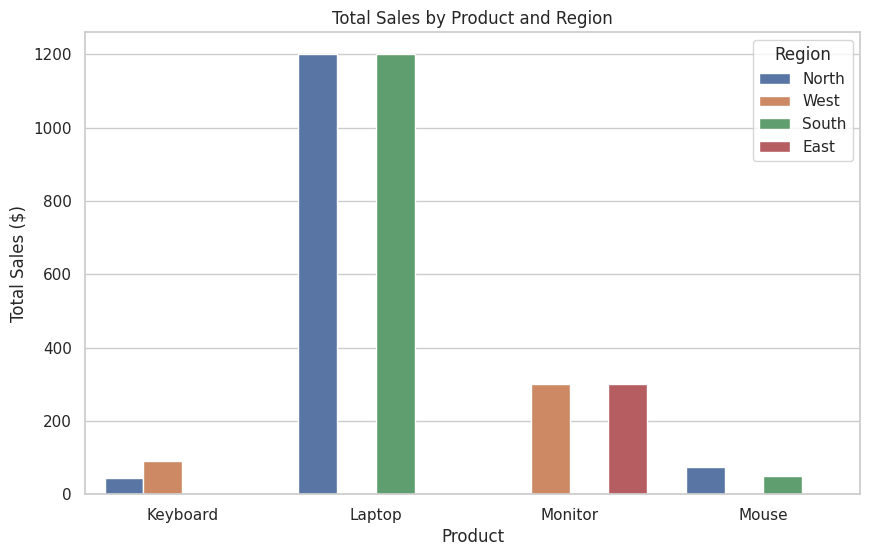

/tmp/ipython-input-3350683288.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sales_per_customer, x="customer", y="total_sales", palette="viridis")


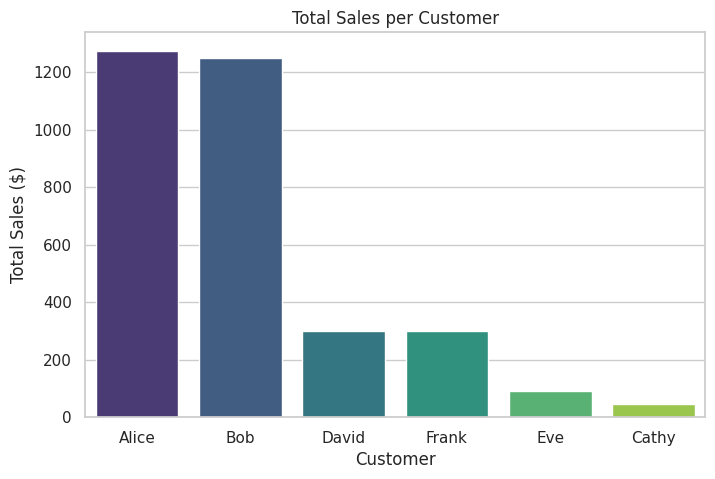

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

sales_by_product_region = sales_pyspark_df.groupBy("product", "region") \
    .agg(spark_sum("total_amount").alias("total_sales")) \
    .orderBy("product", "region") \
    .toPandas()

print(sales_by_product_region)

plt.figure(figsize=(10,6))
sns.barplot(
    data=sales_by_product_region,
    x="product",
    y="total_sales",
    hue="region"
)
plt.title("Total Sales by Product and Region")
plt.ylabel("Total Sales ($)")
plt.xlabel("Product")
plt.legend(title="Region")
plt.show()

sales_per_customer = sales_pyspark_df.groupBy("customer") \
    .agg(spark_sum("total_amount").alias("total_sales")) \
    .orderBy("total_sales", ascending=False) \
    .toPandas()

plt.figure(figsize=(8,5))
sns.barplot(data=sales_per_customer, x="customer", y="total_sales", palette="viridis")
plt.title("Total Sales per Customer")
plt.ylabel("Total Sales ($)")
plt.xlabel("Customer")
plt.show()


Create Sample JSON File

In [6]:
import json

sales_data = [
    {"sale_id": 1, "customer": "Alice", "product": "Laptop", "quantity": 1, "price": 1200, "date": "2025-11-01", "region": "North"},
    {"sale_id": 2, "customer": "Bob", "product": "Mouse", "quantity": 2, "price": 25, "date": "2025-11-02", "region": "South"},
    {"sale_id": 3, "customer": "Cathy", "product": "Keyboard", "quantity": 1, "price": 45, "date": "2025-11-02", "region": "North"},
    {"sale_id": 4, "customer": "David", "product": "Monitor", "quantity": 1, "price": 300, "date": "2025-11-03", "region": "East"},
    {"sale_id": 5, "customer": "Alice", "product": "Mouse", "quantity": 3, "price": 25, "date": "2025-11-03", "region": "North"},
    {"sale_id": 6, "customer": "Bob", "product": "Laptop", "quantity": 1, "price": 1200, "date": "2025-11-04", "region": "South"},
    {"sale_id": 7, "customer": "Eve", "product": "Keyboard", "quantity": 2, "price": 45, "date": "2025-11-04", "region": "East"},
    {"sale_id": 8, "customer": "Frank", "product": "Monitor", "quantity": 1, "price": 300, "date": "2025-11-05", "region": "West"}
]

json_file_path = "/content/sales_data.json"

with open(json_file_path, "w") as f:
    for record in sales_data:
        f.write(json.dumps(record) + "\n")

print("JSON Lines file written successfully!")


JSON Lines file written successfully!


Load JSON Data into DataFrame

In [7]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("LoadSalesJSON").getOrCreate()

sales_json_df = spark.read.json("/content/sales_data.json")

sales_json_df.printSchema()
sales_json_df.show()


root
 |-- customer: string (nullable = true)
 |-- date: string (nullable = true)
 |-- price: long (nullable = true)
 |-- product: string (nullable = true)
 |-- quantity: long (nullable = true)
 |-- region: string (nullable = true)
 |-- sale_id: long (nullable = true)

+--------+----------+-----+--------+--------+------+-------+
|customer|      date|price| product|quantity|region|sale_id|
+--------+----------+-----+--------+--------+------+-------+
|   Alice|2025-11-01| 1200|  Laptop|       1| North|      1|
|     Bob|2025-11-02|   25|   Mouse|       2| South|      2|
|   Cathy|2025-11-02|   45|Keyboard|       1| North|      3|
|   David|2025-11-03|  300| Monitor|       1|  East|      4|
|   Alice|2025-11-03|   25|   Mouse|       3| North|      5|
|     Bob|2025-11-04| 1200|  Laptop|       1| South|      6|
|     Eve|2025-11-04|   45|Keyboard|       2|  East|      7|
|   Frank|2025-11-05|  300| Monitor|       1|  West|      8|
+--------+----------+-----+--------+--------+------+-------+

Summary: Spark Data Loading & Analysis (CSV + JSON)

This project demonstrates how to create sample datasets, load them into PySpark DataFrames, and perform analytical operations using both the DataFrame API and Spark SQL. It also covers visualizing sales performance and correctly handling JSON data formats.

 1. Created Sample Sales CSV File

A sales dataset was created containing:

sale_id

customer

product

quantity

price

date

region

The data was saved as sales_data.csv and used for Spark processing.

 2. Loaded CSV Data Using Spark

Using:

spark.read.csv(path, header=True, inferSchema=True)


Spark successfully inferred the schema.
A new computed column total_amount was added:

total_amount = quantity * price

 3. Performed Sales Analysis
Using DataFrame API

Total sales by product + region

Average sales

Total quantity sold

Using Spark SQL

Registered the DataFrame as a temporary view and executed SQL queries:

Sales summary by product and region

Total sales per customer

Filtering sales with quantity > 1

Both API and SQL produced matching analytical results.

4. Visualized Sales Performance

Using Pandas + Matplotlib:

Bar charts showing total sales per product

Optional plots for regional sales distribution

These visualizations help identify high-performing products.

 5. Created Sample JSON File (Correct Format)

Initially, JSON was written as a list ([ {...}, {...} ]), which Spark does not accept directly.

To fix this, the data was rewritten in JSON Lines (NDJSON) format:

{...}
{...}
{...}


This is the correct format for Spark JSON ingestion.

6. Loaded JSON Data Into Spark

Using:

spark.read.json("sales_data.json")


Spark successfully parsed the JSON Lines file and created a structured DataFrame with the proper schema.